In [7]:
import dismech_nn
import torch
import torchdiffeq
import matplotlib.pyplot as plt

In [8]:
def visualize_vectors(fun, x_span = [-10.0, 10.0], v_span = [-10.0, 10.0], step = 1):
    X, Y = torch.meshgrid(torch.arange(*x_span, step), torch.arange(*v_span, step), indexing='ij')
    grid = torch.stack([X, Y], dim=-1).view(-1, 2)
    magnitudes = fun([], grid).detach().reshape(len(X), len(Y), 2).permute(2,1,0)
    plt.quiver(X, Y, magnitudes[1], magnitudes[0])
    plt.xlabel("Position")
    plt.ylabel("Velocity")
    plt.title("Vector Field")

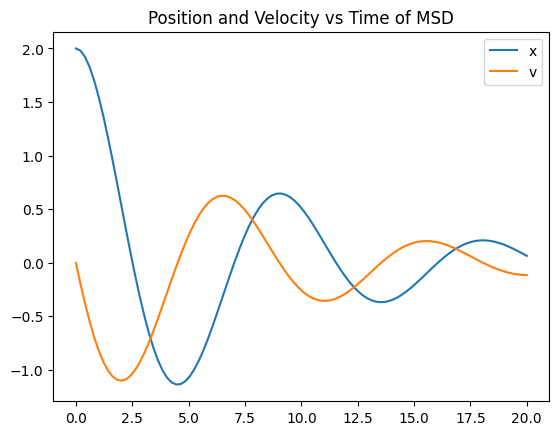

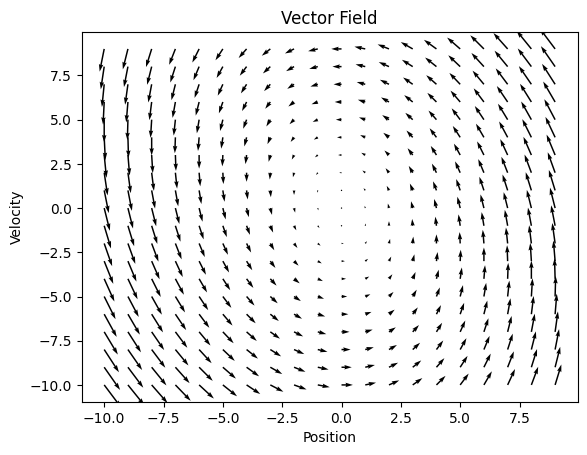

In [9]:
# Create a MSD system by instantiating a MSD module with m, k, and b
msd = dismech_nn.MSD(2,1,0.5)

# Create a 1D tensor for all time evaluated points
t = torch.linspace(0, 20, 100)
y0 = torch.tensor([2.0, 0.0])

sol = torchdiffeq.odeint_adjoint(msd, y0, t)

plt.plot(t, sol, label=["x", "v"])
plt.legend()
plt.title("Position and Velocity vs Time of MSD")
plt.show()

visualize_vectors(msd)

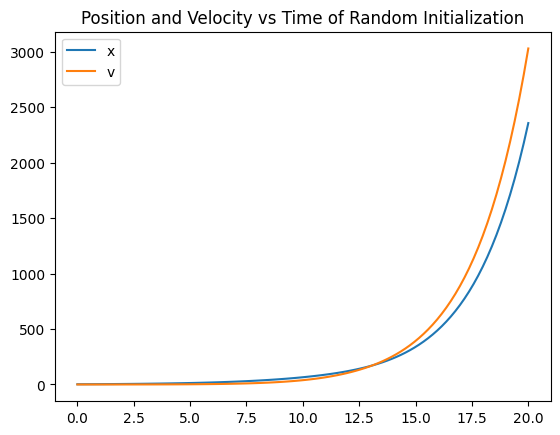

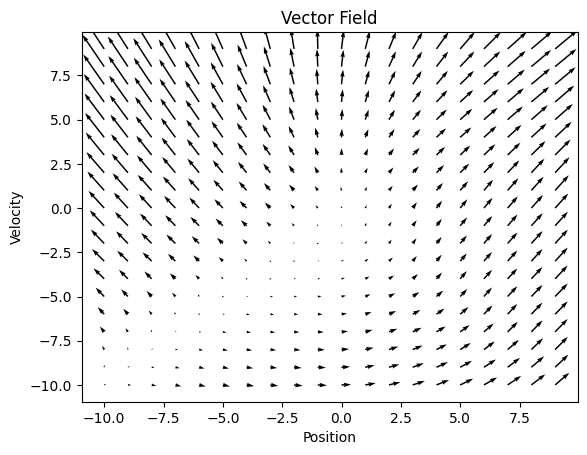

In [10]:
mlp = dismech_nn.MLP()

sol = torchdiffeq.odeint_adjoint(mlp, y0, t).detach()   # detach to remove backprop

plt.plot(t, sol, label=["x", "v"])
plt.legend()
plt.title("Position and Velocity vs Time of Random Initialization")
plt.show()

visualize_vectors(mlp)